In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.kernel_approximation import Nystroem


def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

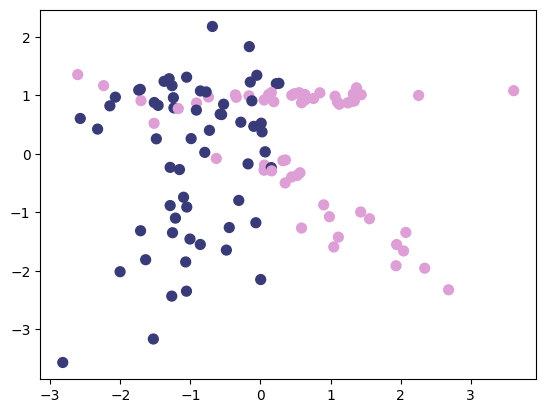

In [39]:
X,y = make_classification(n_samples=120,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_clusters_per_class=2)

plot_2d_clf_problem(X,y)

train acc: 0.8645833333333334
test acc: 0.6666666666666666
conf mat train: 
[[44  7]
 [ 6 39]]
conf mat  test: 
[[ 3  6]
 [ 2 13]]


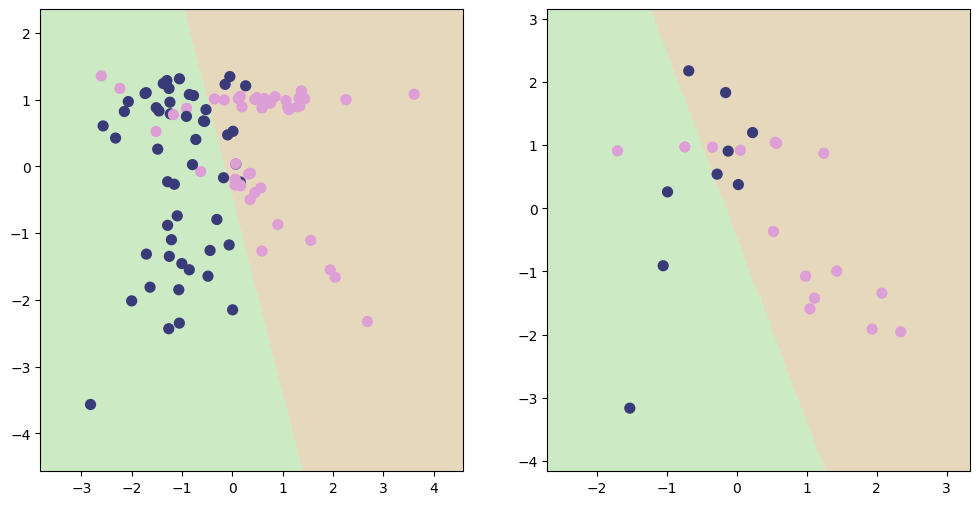

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = LogisticRegression()
clf.fit(x_train, y_train)

pred_train = clf.predict(x_train)
pred_test = clf.predict(x_test)

print(f'train acc: {accuracy_score(y_train, pred_train)}')
print(f'test acc: {accuracy_score(y_test, pred_test)}')
print(f'conf mat train: \n{confusion_matrix(y_train, pred_train)}')
print(f'conf mat  test: \n{confusion_matrix(y_test, pred_test)}')

fig = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_2d_clf_problem(x_train, y_train, h=lambda x: clf.predict(x) > 0.5)
plt.subplot(1,2,2)
plot_2d_clf_problem(x_test, y_test, h=lambda x: clf.predict(x) > 0.5)

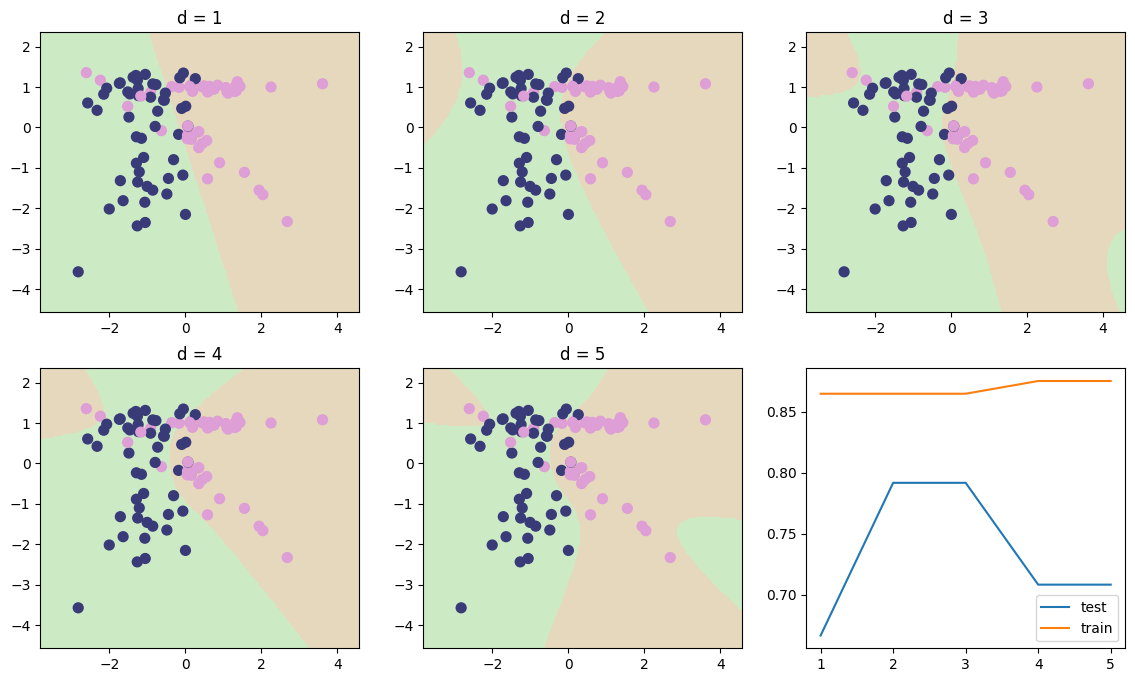

In [69]:
ds = [i for i in range(1,6)]

test_accs = []
train_accs = []

models = []

fig = plt.figure(figsize=(14,8))


for i, d in enumerate(ds):
    poly = PolynomialFeatures(degree=d, include_bias=False)
    phi = poly.fit_transform(x_train)

    clf = LogisticRegression()

    clf.fit(phi, y_train)

    train_accs.append(clf.score(phi, y_train))
    test_accs.append(clf.score(poly.transform(x_test), y_test))

    plt.subplot(2,3,i+1)
    plt.title(f'd = {d}')
    plot_2d_clf_problem(x_train, y_train, h=lambda x: clf.predict(poly.transform(x)) > 0.5)


plt.subplot(2,3,6)
plt.plot(np.arange(1,len(test_accs)+1), test_accs, label='test')
plt.plot(np.arange(1,len(test_accs)+1), train_accs, label='train')
plt.legend()
plt.show()


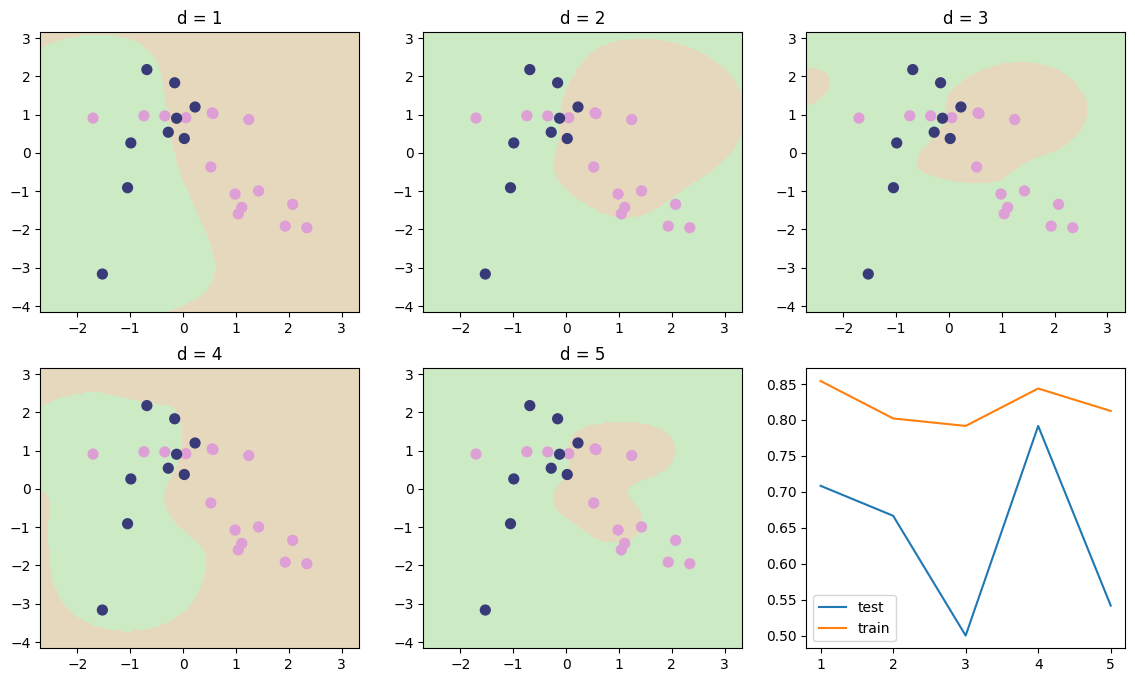

4
0.7916666666666666


In [91]:
ds = [i for i in range(1,6)]

test_accs = []
train_accs = []

models = []

fig = plt.figure(figsize=(14,8))


for i, d in enumerate(ds):
    poly = Nystroem(n_components=12, gamma=d/2)
    phi = poly.fit_transform(x_train)

    clf = LogisticRegression()

    clf.fit(phi, y_train)

    train_accs.append(clf.score(phi, y_train))
    test_accs.append(clf.score(poly.transform(x_test), y_test))

    plt.subplot(2,3,i+1)
    plt.title(f'd = {d}')
    plot_2d_clf_problem(x_test, y_test, h=lambda x: clf.predict(poly.transform(x)) > 0.5)


plt.subplot(2,3,6)
plt.plot(np.arange(1,len(test_accs)+1), test_accs, label='test')
plt.plot(np.arange(1,len(test_accs)+1), train_accs, label='train')
plt.legend()
plt.show()
print(np.argmax(test_accs) + 1)
print(np.max(test_accs))